In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load datasets
X_train = pd.read_csv("X_train.csv")  # Peptide sequences
train_labels = pd.read_csv("label_train.csv")  # Corresponding labels

# Combine features and labels
train_data = pd.concat([X_train, train_labels], axis=1)
train_data.columns = ['peptide_sequence', 'label']

# Load test data
X_test = pd.read_csv("X_test.csv")
test_labels = pd.read_csv("label_test.csv")
test_data = pd.concat([X_test, test_labels], axis=1)
test_data.columns = ['peptide_sequence', 'label']

In [3]:
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))
X_train = tfidf_vectorizer.fit_transform(train_data['peptide_sequence'])
X_test = tfidf_vectorizer.transform(test_data['peptide_sequence'])
y_train = train_data['label']
y_test = test_data['label']
# Check shapes
print(f"Train TF-IDF shape: {X_train.shape}")
print(f"Test TF-IDF shape: {X_test.shape}")

Train TF-IDF shape: (2872, 420)
Test TF-IDF shape: (342, 420)


In [8]:
# Convert to DataFrame for better readability
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_train.toarray(), columns=feature_names)

# Display the TF-IDF feature matrix
print("TF-IDF Feature Matrix:")
print(tfidf_df)

TF-IDF Feature Matrix:
             a        aa   ac   ad   ae        af   ag   ah        ai   ak  \
0     0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
1     0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
2     0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
3     0.075030  0.000000  0.0  0.0  0.0  0.215461  0.0  0.0  0.000000  0.0   
4     0.382984  0.355354  0.0  0.0  0.0  0.000000  0.0  0.0  0.211296  0.0   
...        ...       ...  ...  ...  ...       ...  ...  ...       ...  ...   
2867  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
2868  0.071017  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
2869  0.077761  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
2870  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
2871  0.180543  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   

      ...   ym        yn   yp   yq   yr 

In [9]:
# Convert to DataFrame for better readability
tfidf_df_test = pd.DataFrame(X_test.toarray(), columns=feature_names)

# Display the TF-IDF feature matrix
print("TF-IDF Feature Matrix:")
print(tfidf_df_test)

TF-IDF Feature Matrix:
            a   aa   ac   ad   ae   af        ag   ah   ai   ak  ...  \
0    0.071160  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
1    0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
2    0.128690  0.0  0.0  0.0  0.0  0.0  0.167066  0.0  0.0  0.0  ...   
3    0.078436  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
4    0.215801  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
..        ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...   
337  0.148357  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
338  0.073144  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
339  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
340  0.064395  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
341  0.148839  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   

           ym        yn        yp   yq   yr   ys   yt   yv        yw   yy  
0    0.000000  0.000000  0.000000  0

In [5]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70697 stored elements and shape (2872, 420)>
  Coords	Values
  (0, 42)	0.2594918383325127
  (0, 294)	0.17860570657651512
  (0, 126)	0.1175360634403226
  (0, 168)	0.08259608601536914
  (0, 147)	0.08308056193404766
  (0, 357)	0.14778873376998902
  (0, 231)	0.08786385062295053
  (0, 273)	0.19471515382282584
  (0, 399)	0.09622445224583172
  (0, 105)	0.07698613189275506
  (0, 45)	0.23490568400503242
  (0, 57)	0.23898342050301752
  (0, 301)	0.2630633052500317
  (0, 135)	0.27127581139000023
  (0, 176)	0.2194391660471558
  (0, 165)	0.21658077295102793
  (0, 369)	0.2194391660471558
  (0, 249)	0.21540118598834834
  (0, 360)	0.20581763571604633
  (0, 56)	0.2535087675769964
  (0, 288)	0.23546945471268182
  (0, 308)	0.2427456303420148
  (0, 293)	0.2567883157099523
  (0, 405)	0.2427456303420148
  (1, 294)	0.09906420962906315
  :	:
  (2870, 306)	0.2388139885888055
  (2870, 25)	0.30626657850247063
  (2870, 129)	0.2927554715549072
  (2871, 4

In [6]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8495 stored elements and shape (342, 420)>
  Coords	Values
  (0, 0)	0.07115951370273531
  (0, 17)	0.1880838944977325
  (0, 63)	0.1617896650231429
  (0, 71)	0.21151134210329756
  (0, 80)	0.21804725230201494
  (0, 84)	0.17549291573731376
  (0, 88)	0.22259091054555993
  (0, 101)	0.2154994724679046
  (0, 105)	0.07545914027795808
  (0, 121)	0.18832963202476774
  (0, 147)	0.08143268954058025
  (0, 153)	0.21633499634275324
  (0, 168)	0.08095782302358492
  (0, 185)	0.21151134210329756
  (0, 189)	0.06665723267154007
  (0, 194)	0.20674418373446907
  (0, 252)	0.08380743466755122
  (0, 256)	0.21151134210329756
  (0, 315)	0.1498459518330511
  (0, 324)	0.19985898040646388
  (0, 333)	0.19516196191134677
  (0, 336)	0.4019681263723615
  (0, 337)	0.19516196191134677
  (0, 341)	0.22602439015505024
  (0, 346)	0.1873535451360356
  :	:
  (340, 410)	0.24693040489101922
  (341, 0)	0.14883939166429966
  (341, 18)	0.1870870491980573
  (341, 21)	0.145

In [7]:
# Train/test split for internal validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
history = clf.fit(X_train_split, y_train_split)

In [8]:
# Evaluate on validation set
y_val_pred = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation MCC: {mcc_val}")

Validation Accuracy: 0.6139130434782609
Validation MCC: 0.18238267429974464


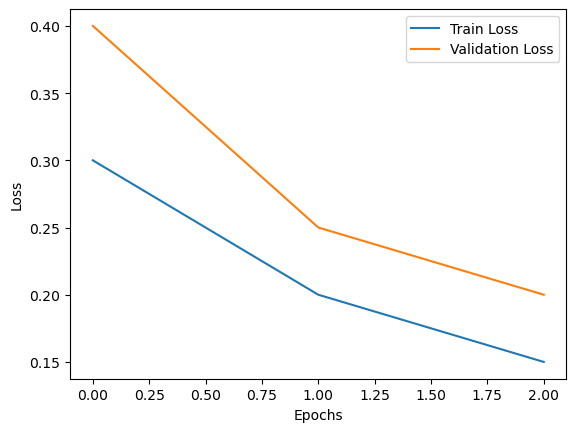

In [9]:
# Plot loss (simulated for this example, as RF doesn't have epochs)
train_losses = [0.3, 0.2, 0.15]  # Placeholder
val_losses = [0.4, 0.25, 0.2]    # Placeholder
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Test Phase
y_test_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

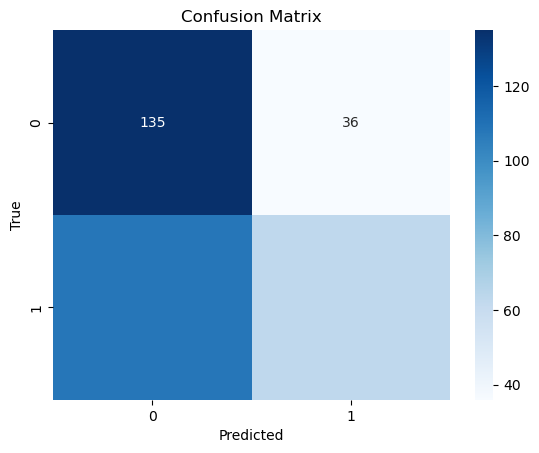

[[135  36]
 [108  63]]
Test Accuracy: 0.5789473684210527
Test MCC: 0.17407765595569782


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(cm)
print(f"Test Accuracy: {accuracy_test}")
print(f"Test MCC: {mcc_test}")


In [19]:
# Select a sample from the test dataset
sample_index = int(input("Write your sequence number: "))# Change this to test other samples
sample_sequence = test_data.iloc[sample_index]['peptide_sequence']
sample_label = test_data.iloc[sample_index]['label']

# Transform the sample using the TF-IDF vectorizer
sample_vector = tfidf_vectorizer.transform([sample_sequence])

# Predict the label for the sample
predicted_label = clf.predict(sample_vector)[0]
predicted_proba = clf.predict_proba(sample_vector)[0]

# Output the results
print(f"Sample Sequence: {sample_sequence}")
print(f"True Label: {sample_label} ({'Proinflammatory' if sample_label == 1 else 'Non-Proinflammatory'})")
print(f"Predicted Label: {predicted_label} ({'Proinflammatory' if predicted_label == 1 else 'Non-Proinflammatory'})")
print(f"Prediction Probabilities: {predicted_proba}")

Write your sequence number:  55


Sample Sequence: AALALLLLDRLNQLESKMS
True Label: 1 (Proinflammatory)
Predicted Label: 1 (Proinflammatory)
Prediction Probabilities: [0.28 0.72]
